In [1]:
#ΤΟ ΘΕΛΩ ΠΑΝΤΟΤΕ
! pip install -U scikit-learn
#ΤΟ ΘΕΛΩ ΓΙΑ ΝΑ ΚΑΝΩ IMBALANCE ΤΟ DATASET ΜΟΥ
#! pip install -U imbalanced-learn

Requirement already up-to-date: scikit-learn in c:\users\user\anaconda3\lib\site-packages (0.22.2.post1)


In [2]:
#ΧΡΗΣΙΜΑ ΕΡΓΑΛΕΙΑ ΠΟΥ ΑΡΓΑ Η ΓΡΗΓΟΡΑ ΘΑ ΤΑ ΤΑ ΧΡΕΙΑΣΤΕΙΣ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#ΧΡΗΣΙΜΟ ΓΙΑ ΝΑ ΠΑΡΕΙΣ ΓΡΑΦΙΚΕΣ ΠΑΡΑΣΤΑΣΕΙΣ
import seaborn as sns

#ΕΡΓΑΛΕΙΑ ΓΙΑ ΝΑ ΚΑΝΕΙς IMPUTE TO DATASET ΣΟΥ ΔΗΛΑΔΗ ΝΑ ΓΕΜΊΣΕΙΣ ΜΕ ΤΙΜΕΣ ΤΑ NaN ΚΕΛΙΑ - ΛΕΙΤΟΥΡΓΕΙ ΓΙΑ ΑΡΙΘΜΗΤΙΚΕς ΤΙΜΕΣ
from sklearn.impute import SimpleImputer 
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#ΓΙΑ ΝΑ ΚΑΝΕΙΣ LABEL ENCODER
from sklearn.preprocessing import LabelEncoder

#ΟΤΑΝ ΘΕΛΕΙΣ ΝΑ ΚΑΝΕΙΣ SPLIT ΤΟ DATASET ΣΟΥ ΣΕ TRAIN-TEST
#from sklearn.model_selection import train_test_split

#from sklearn import preprocessing
#from sklearn.decomposition import PCA
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.preprocessing import LabelEncoder

#ΕΡΓΑΛΕΙΑ ΓΙΑ ΝΑ ΠΡΑΓΜΑΤΟΠΟΙΗΣΩ ΙΜΒΑLANCE - OVERSAMPLING - UNDERSAMPLING
#from imblearn.over_sampling import RandomOverSampler
#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.under_sampling import TomekLinks
#from imblearn.over_sampling import SMOTE #ΠΡΟΚΑΛΕΙ ΘΕΜΑΤΑ ΟΤΑΝ ΕΧΟΥΜΕ ΤΕΡΑΣΤΙΕΣ ΔΙΑΦΟΡΕΣ , ΧΡΗΣΙΜΟΠΟΙΕΙ KNN
#from imblearn.combine import SMOTETomek
#from imblearn.under_sampling import ClusterCentroids


In [3]:
from sklearn.datasets import load_diabetes

In [4]:
boston=load_diabetes()

## ΤΡΟΠΟΙ ΝΑ ΚΑΤΑΝΟΗΣΕΙΣ ΤΟ DATASET ΣΟΥ:
   
   * boston.keys() : Μας δίνει τις λέξεις κλειδία του Dataset και το πως έχει χωριστεί
  
  
   * data.shape :   Μας δίνει τις διαστάσεις του data (ποσα δείγματα έχουμε,ποσα χαρακτηριστικά έχει κάθε δειγμα χωρίς να                      περιλαμβανουμε το target-στοχο )
   
   * data.head() :   Μας δίνει τα πρώτα 5 στοιχεία - Πρέπει να είναι σε DataFrame μορφή
   
   
   * data.describe() : Μας δίνει χρήσιμες πληροφορίες για το κάθε χαρακτηριστικό ( μέση τιμή , μέγιστο , ελάχιστο) - Πρέπει                        να είναι σε DataFrame μορφή
   
   
   * data.info() :  Μας δίνει πληροφορίες για το τι είναι το data και τι είναι τα χαρακτηριστικά του - Πρέπει να είναι σε                       μορφή DataFrame

In [5]:
boston.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [6]:
descr=boston.DESCR
data=boston.data
target=boston.target
feature_names=boston.feature_names

In [7]:
print(data.shape)
print("Έχουμε", len(data), "δείγματα.")
print("Το καθένα έχει ", data.shape[1], "χαραχτηριστικά")

(442, 10)
Έχουμε 442 δείγματα.
Το καθένα έχει  10 χαραχτηριστικά


In [8]:
data=pd.DataFrame(data=data,columns=feature_names)
target=pd.DataFrame(data=target,columns=['Price'])
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [9]:
target.head()

,Price
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [10]:
new=pd.concat([data, target], axis=1)
data=new
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Price
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
age      442 non-null float64
sex      442 non-null float64
bmi      442 non-null float64
bp       442 non-null float64
s1       442 non-null float64
s2       442 non-null float64
s3       442 non-null float64
s4       442 non-null float64
s5       442 non-null float64
s6       442 non-null float64
Price    442 non-null float64
dtypes: float64(11)
memory usage: 38.1 KB


## Αντιμετώπιση Απουσιάζουσων τιμών ΝaN  
##### Η μόνη μορφή προεπεξεργασίας που καλύτερο θα ήταν να γίνει πριν απο τον διαχωρισμό σε train-test

In [12]:
#ΠΛΗΡΟΦΟΡΙΕΣ ΓΙΑ ΤΟ ΠΟΥ ΕΧΩ ΑΠΟΥΣΙΑΖΟΥΣΕΣ ΤΙΜΕΣ
def null_info(data):
    null_columns=data.columns[data.isnull().any()]
    print(data[data.isnull().any(axis=1)][null_columns])
    print(data.isnull().sum())
    print('Ποσοστο απουσιαζουσων τιμων ειναι=\n', data.isna().mean().round(4) * 100)

# SIMPLEIMPUTER , ΓΕΜΙΖΕΙ ΤΙΣ NaN ΤΙΜΕΣ ΜΕ ΤΗ ΜΕΣΗ ΤΙΜΗ Η ΑΛΛΕΣ ΤΙΜΕΣ ΠΟΥ ΜΠΟΡΟΥΜΕ ΝΑ ΠΕΡΑΣΟΥΜΕ ΣΤΗ ΚΛΗΣΗ ΤΟΥ ΣΤΟ STRATEGY
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
def simpleimpute(data):
    cols=data.columns
    imr= SimpleImputer(missing_values=np.nan,strategy='mean') #strategy = 'most_frequent' για categorical 
    imputed_data= imr.fit_tranform(data.values)
    data=pd.DataFrame(data=imputed_data,columns=cols)
    return data


# ITERATIVE IMPUTER , ΧΡΗΣΙΜΟΠΟΙΕΙ ΤΕΧΝΙΚΕΣ PREDICT ΓΙΑ ΝΑ ΓΕΜΙΣΕΙ ΤΙΣ ΑΠΟΥΣΙΑΖΟΥΕΣ ΤΙΜΕΣ
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html
def iterativeimputer(data):
    cols=data.columns
    imp = IterativeImputer(max_iter=10, random_state=0)
    imputed_data=imp.fit_transform(data.values)
    data=pd.DataFrame(data=imputed_data,columns=cols)
    return data


# ΔΙΑΓΡΑΦΕΙ ΤΙΣ ΑΠΟΥΣΙΑΖΟΥΣΕΣ ΤΙΜΕΣ
def delete_null(data):
    return data.dropna()

#ΑΝΤΙΚΑΘΙΣΤΑ ΤΙΣ ΑΠΟΥΣΙΑΖΟΥΣΕΣ ΤΙΜΕΣ ΜΕ ΕΝΑ VALUE
def replacenull(data,value):
    return data.fillna(value)

In [13]:
null_info(data)

Empty DataFrame
Columns: []
Index: []
age      0
sex      0
bmi      0
bp       0
s1       0
s2       0
s3       0
s4       0
s5       0
s6       0
Price    0
dtype: int64
Ποσοστο απουσιαζουσων τιμων ειναι=
 age      0.0
sex      0.0
bmi      0.0
bp       0.0
s1       0.0
s2       0.0
s3       0.0
s4       0.0
s5       0.0
s6       0.0
Price    0.0
dtype: float64


## Γραφικές Παραστάσεις για τα Δεδομένα Μας-Kατανομες

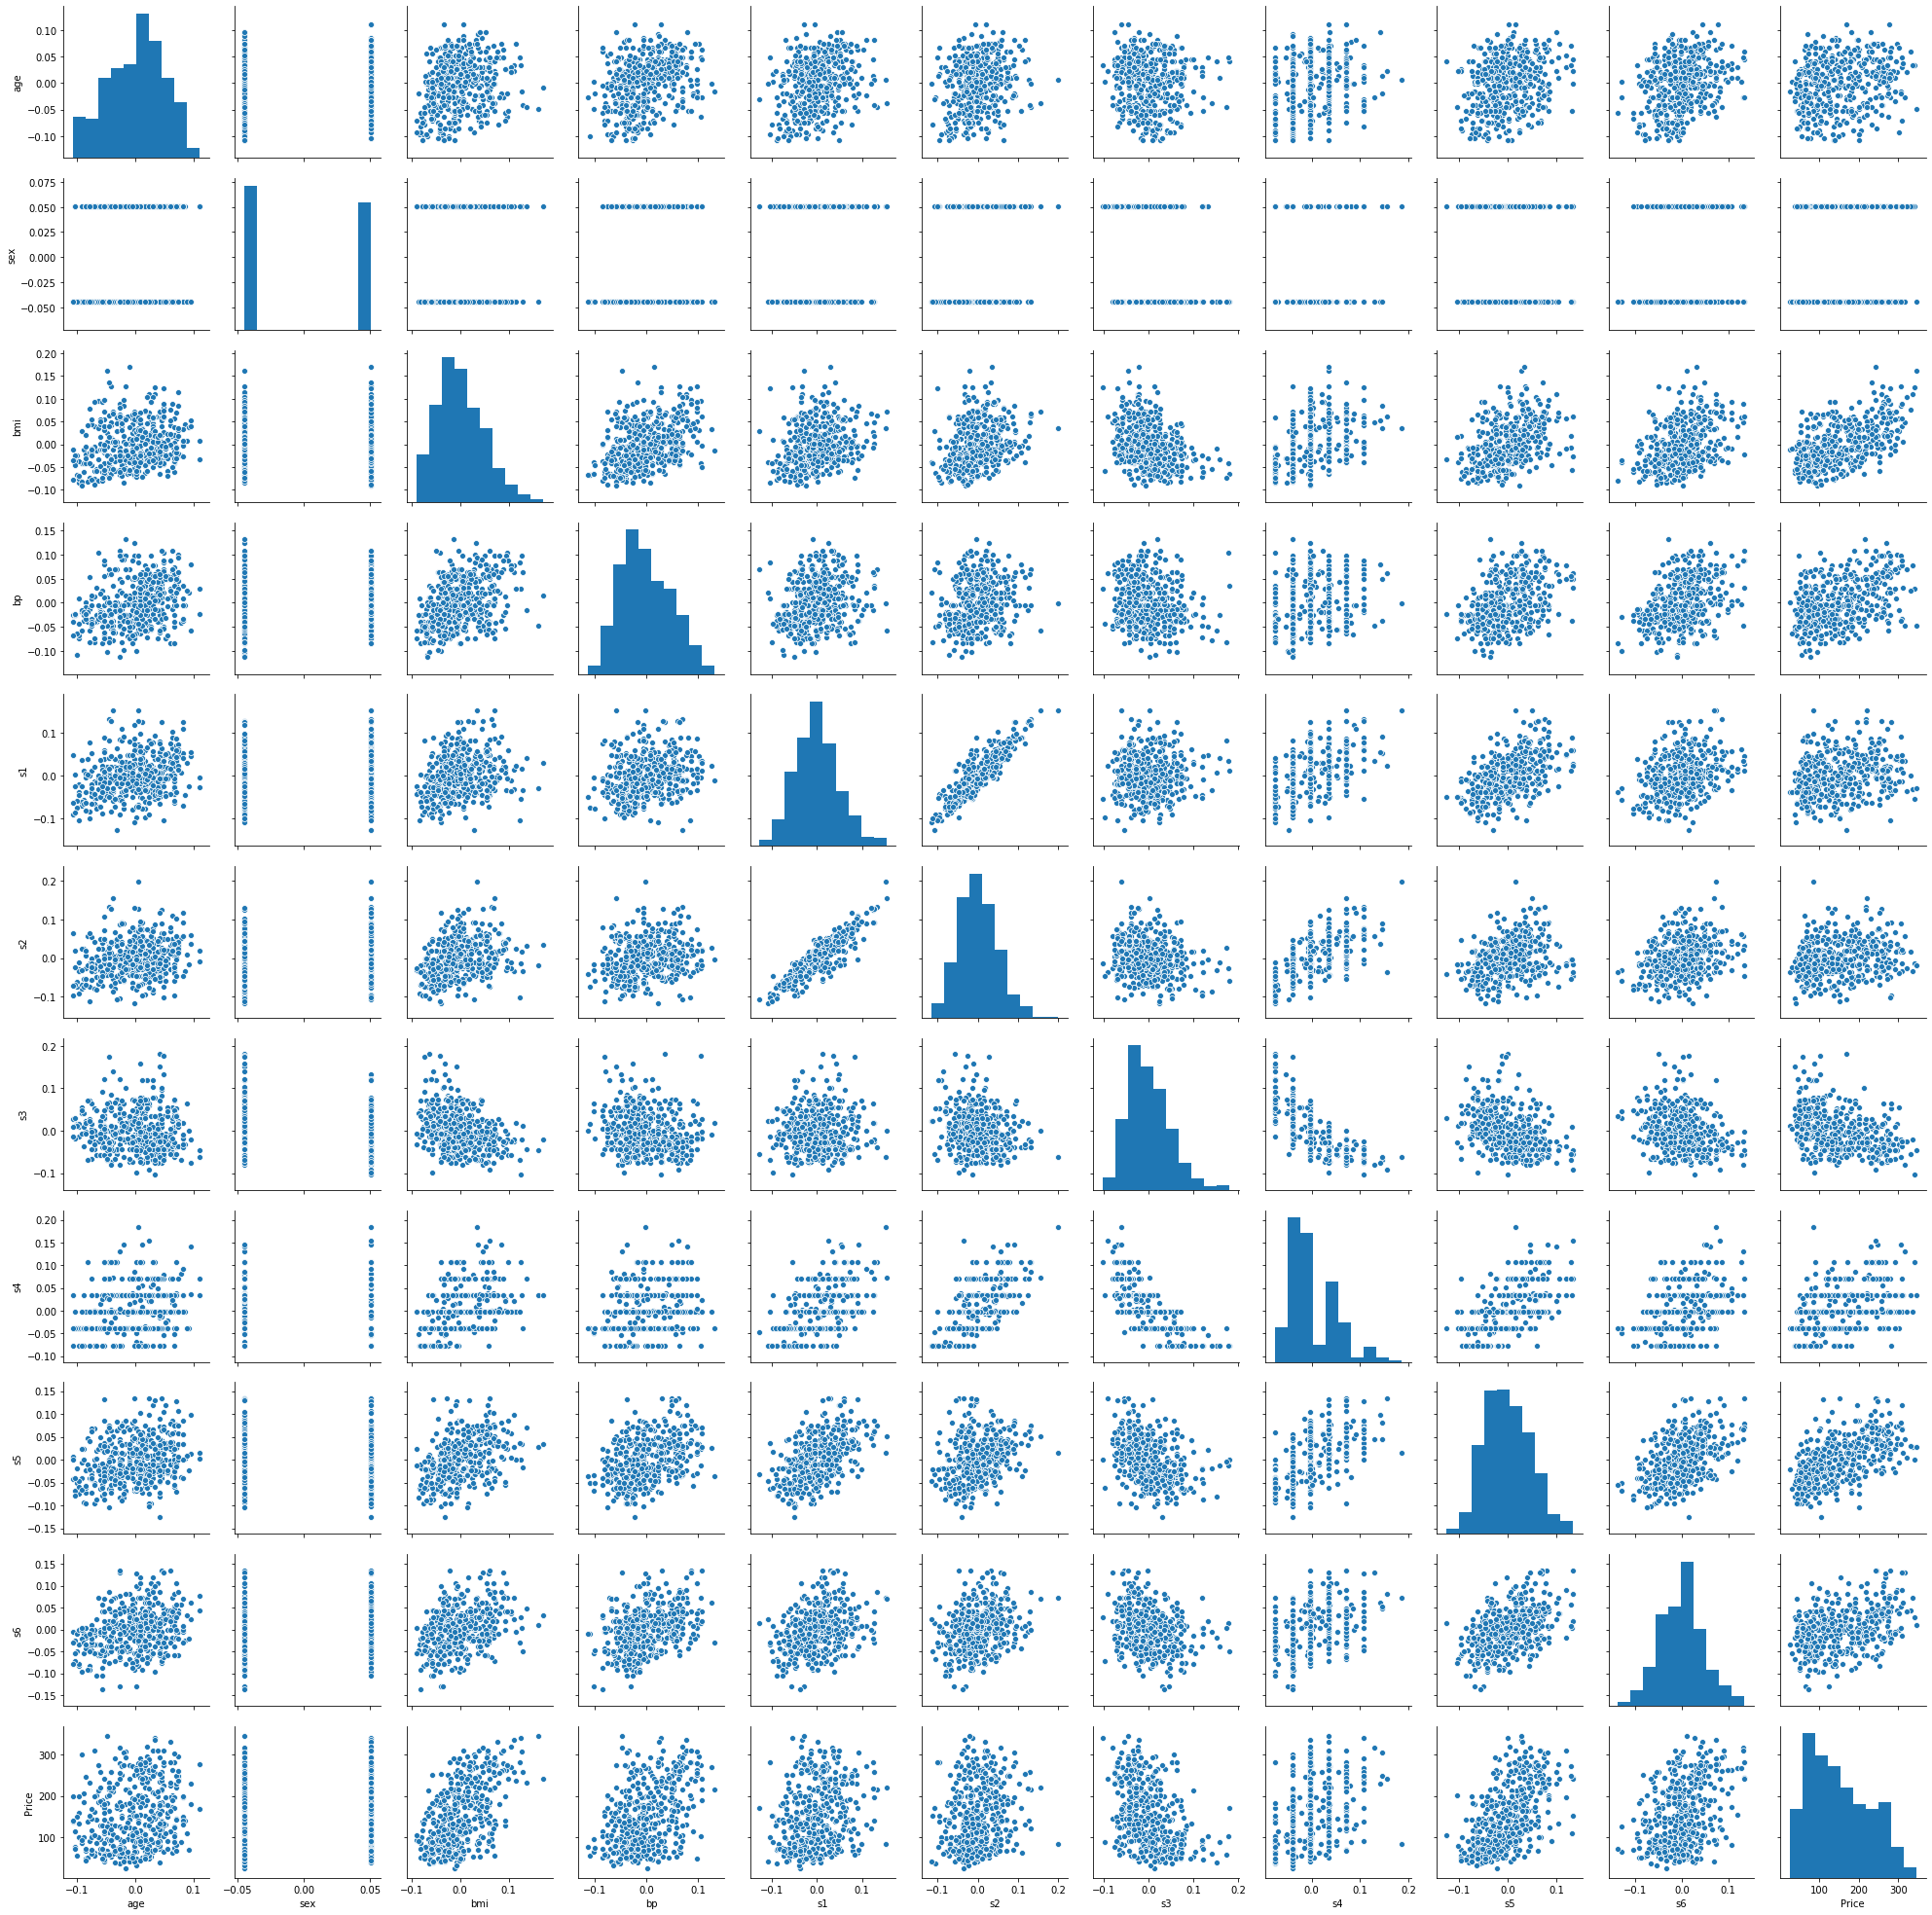

In [14]:
sns.pairplot(data)

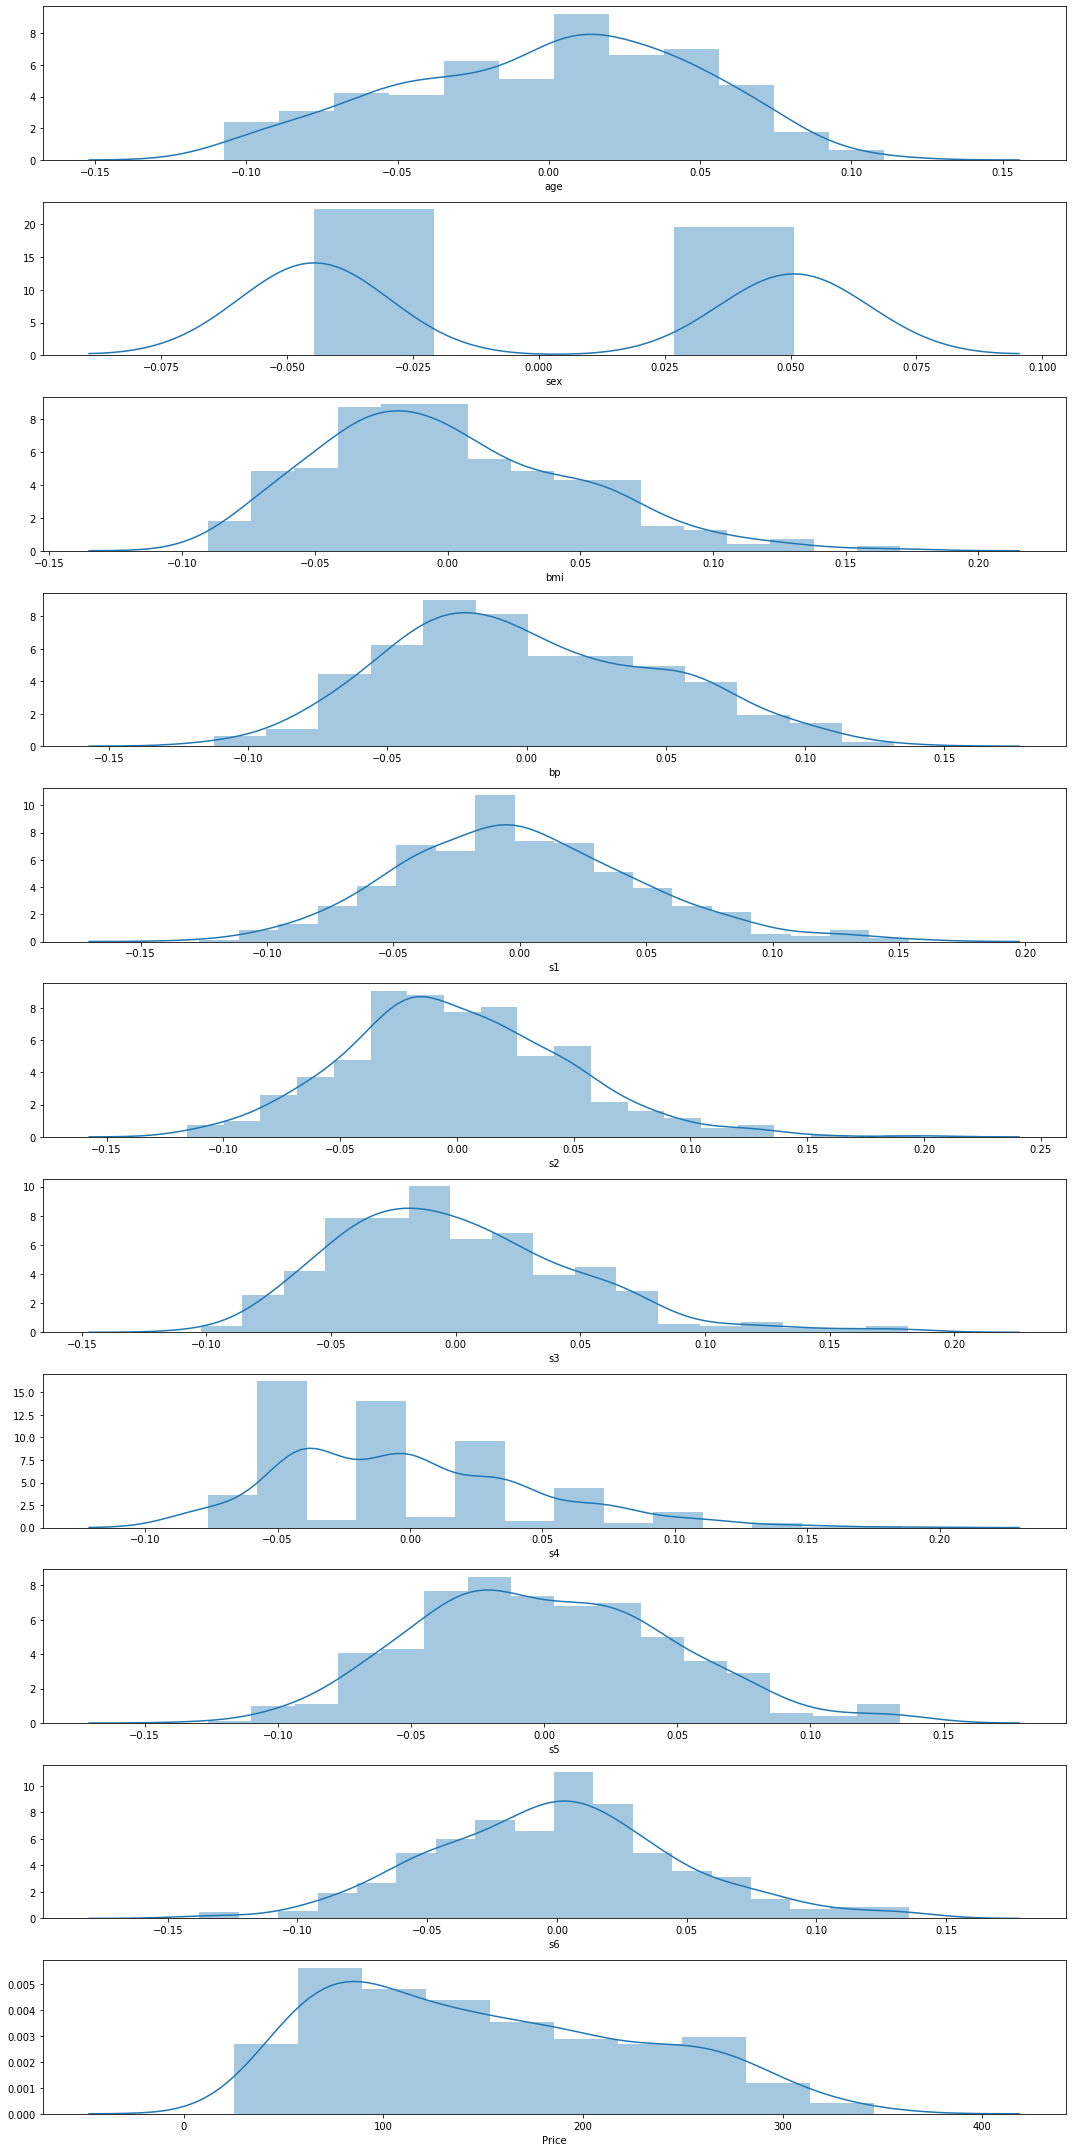

In [15]:
rows = len(data.columns)
cols = 1

fig, ax = plt.subplots(nrows= rows, ncols= cols, figsize = (15,30), squeeze=False)

col = data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(data[col[index]], ax = ax[i][j])
        index = index + 1

plt.tight_layout()

#### Correlation Matrix 
##### Όσο πιο μεγάλη (θετική τιμή) είναι μας λέει ότι όσο αυξάνεται το ένα αυξάνεται και το άλλο
##### Όσο πιο μεγάλη (abs(value)-αρνητική τιμή) είναι μας λέει ότι οσο αυξάνεται το ένα μειώνεται το άλλο

In [16]:
corrmat = data.corr()
corrmat

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Price
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


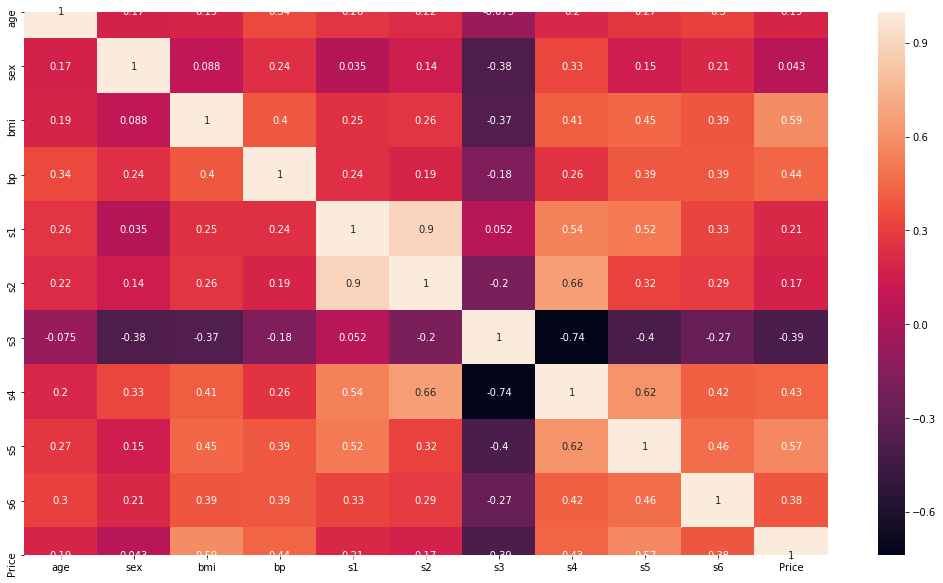

In [17]:
fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(corrmat, annot = True)

#### Μπορούμε να επιλέξουμε ποιαα δεδομένα θα κρατήσουμε , για να έχουμε καλύτερη απόδοση στο μοντέλο μας

In [18]:
#ΚΡΑΤΑΜΕ ΤΑ ΧΑΡΑΚΤΗΡΙΣΤΙΚΑ ΠΟΥ ΕΧΟΥΝ ΠΑΝΩ ΑΠΟ ΤΗΝ ΕΠΙΘΥΜΗΤΗ ΣΥΣΧΕΤΙΣΗ
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [19]:
threshold=0.5
updated=getCorrelatedFeature(corrmat['Price'],threshold)
correlated_data = data[updated.index]
print("Κρατησαμε αυτά :\n", updated)
correlated_data.head()

Κρατησαμε αυτά :
        Corr Value
bmi      0.586450
s5       0.565883
Price    1.000000


,bmi,s5,Price
0,0.061696,0.019908,151.0
1,-0.051474,-0.068330,75.0
2,0.044451,0.002864,141.0
3,-0.011595,0.022692,206.0
4,-0.036385,-0.031991,135.0


## Encoding 
##### Η στρατηγική που θα ακολουθήσουμε είναι :
 * Label Encoding στο Target Μας
 * One Hot Encoding για το Data Μας

In [20]:
from sklearn.datasets import fetch_kddcup99
fetch=fetch_kddcup99()
fetch_data=fetch.data
fetch_target=fetch.target
fetch_Descr=fetch.DESCR
fetch_data=pd.DataFrame(data=fetch_data)
fetch_target=pd.DataFrame(data=fetch_target,columns=['target'])
fetch_data=pd.concat([fetch_data, fetch_target], axis=1)
fetch_data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,target
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1,0,0.11,0,0,0,0,0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1,0,0.05,0,0,0,0,0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1,0,0.03,0,0,0,0,0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1,0,0.03,0,0,0,0,0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1,0,0.02,0,0,0,0,0,b'normal.'


In [21]:
null_info(fetch_data)

Empty DataFrame
Columns: []
Index: []
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
target    0
dtype: int64
Ποσοστο απουσιαζουσων τιμων ειναι=
 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29 

In [22]:
for i in range(len(fetch_data.columns)-1):
    print(i,fetch_data[i].unique())
print('41',fetch_data.target.unique())

0 [0 1 79 ... 2695 2751 120]
1 [b'tcp' b'udp' b'icmp']
2 [b'http' b'smtp' b'finger' b'domain_u' b'auth' b'telnet' b'ftp' b'eco_i'
 b'ntp_u' b'ecr_i' b'other' b'private' b'pop_3' b'ftp_data' b'rje' b'time'
 b'mtp' b'link' b'remote_job' b'gopher' b'ssh' b'name' b'whois' b'domain'
 b'login' b'imap4' b'daytime' b'ctf' b'nntp' b'shell' b'IRC' b'nnsp'
 b'http_443' b'exec' b'printer' b'efs' b'courier' b'uucp' b'klogin'
 b'kshell' b'echo' b'discard' b'systat' b'supdup' b'iso_tsap' b'hostnames'
 b'csnet_ns' b'pop_2' b'sunrpc' b'uucp_path' b'netbios_ns' b'netbios_ssn'
 b'netbios_dgm' b'sql_net' b'vmnet' b'bgp' b'Z39_50' b'ldap' b'netstat'
 b'urh_i' b'X11' b'urp_i' b'pm_dump' b'tftp_u' b'tim_i' b'red_i']
3 [b'SF' b'S1' b'REJ' b'S2' b'S0' b'S3' b'RSTO' b'RSTR' b'RSTOS0' b'OTH'
 b'SH']
4 [181 239 235 ... 500 484 475]
5 [5450 486 1337 ... 34557 10592 13828]
6 [0 1]
7 [0 1 3]
8 [0 2 1 3]
9 [0 1 3 19 6 4 30 24 14 18 2 5 17 22 7 16 12 20 10 28 15 9]
10 [0 1 5 2 4 3]
11 [1 0]
12 [0 2 1 4 16 3 767 7 22 2

In [23]:
#ONE HOT ENCODING ΓΙΑ ΤΙΣ ΣΤΗΛΕΣ ΠΟΥ ΒΛΕΠΟΥΜΕ ΟΤΙ ΜΑΣ ΕΝΟΧΛΟΥΝ
fetch_data=pd.get_dummies(fetch_data,columns=[1,2,3])

#ΤΟΠΟΘΕΤΟΥΜΕ ΤΗΝ ΣΤΗΛΗ Τarget ΣΤΟ ΤΕΛΟΣ ΓΙΑΤΙ ΜΑΣ ΕΞΥΠΗΡΕΤΕΙ
cols = list(fetch_data.columns.values) 
cols.pop(cols.index('target')) 
fetch_data = fetch_data[cols+['target']]

#LABEL ENCODING ΓΙΑ ΤΟ Target
labelencoder = LabelEncoder()
fetch_data.target= labelencoder.fit_transform(fetch_data.target)

In [24]:
fetch_data.head()

,0,4,5,6,7,8,9,10,11,12,...,3_b'RSTO',3_b'RSTOS0',3_b'RSTR',3_b'S0',3_b'S1',3_b'S2',3_b'S3',3_b'SF',3_b'SH',target
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,11
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,11
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,11
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,11
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,11


In [25]:
fetch_data.shape

(494021, 119)